##  ML ASSIGNMENT LAB07

##### 1. Have you come across Grid Search Cross Validation? Fit any two models covered in previous classes and optimize them using Grid search CV.

Reference :

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://towardsdatascience.com/20x-times-faster-grid-search-cross-validation-19ef01409b7c

https://towardsdatascience.com/python-implementation-of-grid-search-and-random-search-for-hyperparameter-optimization-2d6a82ebf75c

To train a robust machine learning model, one must select the correct machine learning algorithm with the correct combination of hyperparameters. The process of choosing the optimal set of parameters is known as hyperparameter tuning.

One must train the dataset on all machine learning algorithms and on a different combination of its hyperparameters to improve the performance metric. The cross-validation technique can be used to train the dataset on various machine learning algorithms and choose the best out of it.

### What is Cross Validation

Cross-Validation is a resampling technique that can be used to evaluate and select machine learning algorithms on a limited dataset. k-fold cross-validation is a type of cross-validation, where the training data is split into k-folds and (k-1) folds is used for training and kth fold is used for validation of the model.

### Grid search CV

Grid Search cross-validation is a technique to select the best of the machine learning model, parameterized by a grid of hyperparameters.

### Importing Required Libraries

In [38]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.model_selection import GridSearchCV

### Importing the Dataset

In [7]:
df = pd.read_csv("cars.csv")

In [8]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


we have found that brand is in categorical, so need to convert into numerical using Labelencoder

In [9]:
le = LabelEncoder()

df['brand'] = le.fit_transform(df['brand'])
df['brand']

0      2
1      0
2      2
3      2
4      2
      ..
256    2
257    1
258    2
259    2
260    2
Name: brand, Length: 261, dtype: int32

In [10]:
# now we convert our data into dependent and independent variables.

In [11]:
X = df.drop(['brand'],axis=1)
X

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978
...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980
257,36.1,4,91,60,1800,16,1979
258,22.0,6,232,112,2835,15,1983
259,18.0,6,232,100,3288,16,1972


In [12]:
Y = df['brand']
Y

0      2
1      0
2      2
3      2
4      2
      ..
256    2
257    1
258    2
259    2
260    2
Name: brand, Length: 261, dtype: int32

#### Convert into training and testing data

In [13]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3,random_state=99)

In [14]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((182, 7), (79, 7), (182,), (79,))

### Decision tree

In [15]:
dt = DecisionTreeClassifier()

In [16]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [17]:
# check for important features to select that only

features=pd.DataFrame({'Features':train_x.columns,'Importance':np.round(dt.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)

In [18]:
features

,Features,Importance
2,cubicinches,0.482
4,weightlbs,0.159
3,hp,0.138
0,mpg,0.095
6,year,0.078
5,time-to-60,0.048
1,cylinders,0.000


Here found that cylinder feature is not important hence dropping.

In [19]:
X = X.drop(['cylinders'], axis=1)
X

,mpg,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,350,165,4209,12,1972
1,31.9,89,71,1925,14,1980
2,17.0,302,140,3449,11,1971
3,15.0,400,150,3761,10,1971
4,30.5,98,63,2051,17,1978
...,...,...,...,...,...,...
256,17.0,305,130,3840,15,1980
257,36.1,91,60,1800,16,1979
258,22.0,232,112,2835,15,1983
259,18.0,232,100,3288,16,1972


In [20]:
# again converting into training and testing 

train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3,random_state=99)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((182, 6), (79, 6), (182,), (79,))

In [21]:
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [22]:
y_pred = dt.predict(test_x)
y_pred

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       0, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2])

In [23]:
results = pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
results

,Actual,Predicted
26,1,1
54,2,2
49,2,2
92,2,2
216,1,2
...,...,...
198,0,0
179,1,2
184,2,1
209,1,1


In [24]:
dt.score(test_x,test_y)

0.759493670886076

In [25]:
accuracy_score(test_y,y_pred)

0.759493670886076

In [26]:
grid = { 
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,12,14],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [28]:
rf_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 12, 14],
                         'max_features': ['sqrt', 'log2'], 'random_state': [18],
                         'splitter': ['best', 'random']})

In [29]:
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'sqrt',
 'random_state': 18,
 'splitter': 'best'}

In [30]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features='sqrt', splitter='random' , random_state=18)

In [32]:
clf.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=18,
                       splitter='random')

In [33]:
prediction = clf.predict(test_x)

In [35]:
confusion_matrix(test_y, prediction)

array([[ 6,  2,  5],
       [ 3, 13,  6],
       [ 1,  1, 42]], dtype=int64)

In [36]:
accuracy_score(test_y, prediction)

0.7721518987341772

In [40]:
f1_score(test_y,prediction, average="micro")

0.7721518987341772

In [ ]:
### Random forest classifier

In [61]:

train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3,random_state=99)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((182, 6), (79, 6), (182,), (79,))

In [62]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, random_state = 18).fit(X_train, y_train)

In [65]:
prediction = clf.predict(X_test)

In [66]:
confusion_matrix(y_test, prediction)

array([[ 7,  3,  7],
       [ 2, 17,  6],
       [ 1,  0, 44]], dtype=int64)

In [69]:
accuracy_score(y_test, prediction)

0.7816091954022989

In [70]:
f1_score(y_test,prediction, average="micro")

0.781609195402299

In [73]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [72]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [74]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 18}

In [75]:
clf = RandomForestClassifier(n_estimators = 200, max_depth=4, max_features='sqrt' , random_state = 18).fit(X_train, y_train)

In [76]:
prediction = clf.predict(X_test)

In [77]:
confusion_matrix(y_test, prediction)

array([[ 9,  2,  6],
       [ 7,  9,  9],
       [ 1,  0, 44]], dtype=int64)

In [78]:
accuracy_score(y_test, prediction)

0.7126436781609196

In [79]:
f1_score(y_test,prediction, average="micro")

0.7126436781609196

##### 2. What is Stride, Padding & Pooling? Explain with an example.

### Stride

Stride is a component of convolutional neural networks, or neural networks tuned for the compression of images and video data. Stride is a parameter of the neural network's filter that modifies the amount of movement over the image or video. For example, if a neural network's stride is set to 1, the filter will move one pixel, or unit,  at a time. The size of the filter affects the encoded output volume, so stride is often set to a whole integer, rather than a fraction or decimal.

How does stride work!
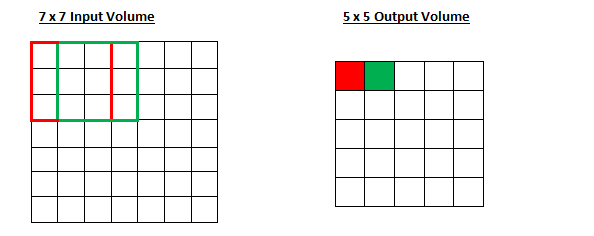
Imagine a convolutional neural network is taking an image and analyzing the content. If the filter size is 3x3 pixels, the contained nine pixels will be converted down to 1 pixel in the output layer. Naturally, as the stride, or movement, is increased, the resulting output will be smaller. Stride is a parameter that works in conjunction with padding, the feature that adds blank, or empty pixels to the frame of the image to allow for a minimized reduction of size in the output layer. Roughly, it is a way of increasing the size of an image, to counteract the fact that stride reduces the size. Padding and stride are the foundational parameters of any convolutional neural network. 
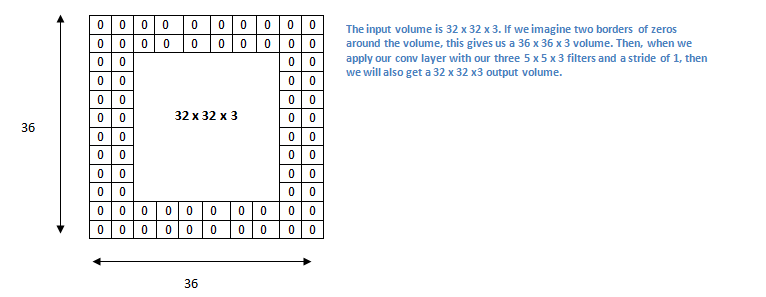

### Padding

The padding plays a vital role in creating CNN. After the convolution operation, the original size of the image is shrunk. Also, in the image classification task, there are multiple convolution layers after which our original image is shrunk after every step, which we don’t want. 

Secondly, when the kernel moves over the original image, it passes through the middle layer more times than the edge layers, due to which there occurs an overlap.

To overcome this problem, a new concept was introduced named padding. It is an additional layer that can add to the borders of an image while preserving the size of the original picture.
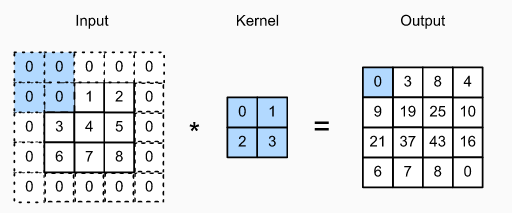


### Pooling

The pooling layer is another building block of a CNN and plays a vital role in pre-processing an image. In the pre-process, the image size shrinks by reducing the number of parameters if the image is too large. When the picture is shrunk, the pixel density is also reduced, the downscaled image is obtained from the previous layers. Basically, its function is to progressively reduce the spatial size of the image to reduce the network complexity and computational cost.

Spatial pooling is also known as downsampling or subsampling that reduces the dimensionality of each map but retains the essential features. A rectified linear activation function, or ReLU, is applied to each value in the feature map. Relu is a simple and effective nonlinearity that does not change the values in the feature map but is present because later subsequent pooling layers are added. Pooling is added after the nonlinearity is applied to the feature maps. There are three types of spatial pooling:

1. Max Pooling
Max pooling is a rule to take the maximum of a region and help to proceed with the most crucial features from the image. It is a sample-based process that transfers continuous functions into discrete counterparts. Its primary objective is to downscale an input by reducing its dimensionality and making assumptions about features contained in the sub-region that were rejected.
![image-3.png](attachment:image-3.png)
![image-4.png](attachment:image-4.png)

2. Average Pooling
It is different from Max Pooling; it retains information about the lesser essential features. It simply downscales by dividing the input matrix into rectangular regions and calculating the average values of each area.
![image-5.png](attachment:image-5.png)
![image-6.png](attachment:image-6.png)

3. Sum Pooling
It is similar to Max pooling, but instead of calculating the maximum value, we calculate the mean of each sub-region.

##### 3. Fit a CNN model on the dataset which has been assigned to you. Print a classification report to see the model metrics on train and test datasets

In [2]:
pip install -U efficientnet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
from keras import backend as K
import cv2
import glob

In [2]:
import matplotlib.pyplot as plt

In [3]:
train_path = "D:\dinsha\ML Lab\archive (2)\train"
test_path = "D:\dinsha\ML Lab\archive (2)\test"
valid_path = "D:\dinsha\ML Lab\archive (2)\valid"

In [4]:
os.path.split(os.path.split(train_path[0])[1])

('', 'D')

In [5]:
classes_train = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_path))
classes_valid = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],valid_path))
classes_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],test_path))

In [6]:
train_df = pd.concat([pd.Series(train_path).astype(str), pd.Series(classes_train)], axis=1)
train_df.columns = ['Images', 'Image_label']

test_df = pd.concat([pd.Series(test_path).astype(str), pd.Series(classes_test)], axis=1)
test_df.columns = ['Images', 'Image_label']

valid_df = pd.concat([pd.Series(valid_path).astype(str), pd.Series(classes_valid)], axis=1)
valid_df.columns = ['Images', 'Image_label']

In [7]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test datase

In [8]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"D:\dinsha\ML Lab\archive (2)\train",                #r is mandatory
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 13572 images belonging to 100 classes.


In [9]:
test_set = test_datagen.flow_from_directory(r'D:\dinsha\ML Lab\archive (2)\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 500 images belonging to 100 classes.


In [10]:
val_gen = train_datagen.flow_from_directory(r"D:\dinsha\ML Lab\archive (2)\valid", 
                                            target_size=(200,200),
                                            class_mode='categorical',
                                            batch_size= 512, shuffle=True)

Found 500 images belonging to 100 classes.


In [11]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt

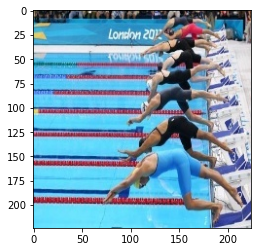

In [12]:
img=cv2.imread(r"D:\dinsha\ML Lab\archive (2)\train\swimming\014.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [13]:
cv2.imread(r"D:\dinsha\ML Lab\archive (2)\train\swimming\014.jpg").shape

(224, 224, 3)

In [14]:
num_classes = 100
input_shape = (224,224,3)

In [15]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dropout (Dropout)           (None, 186624)            0

In [16]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/3
425/425 [==============================] - 492s 1s/step - loss: 1.9322 - accuracy: 0.5206 - val_loss: 2.5689 - val_accuracy: 0.3900
Epoch 2/3
425/425 [==============================] - 495s 1s/step - loss: 1.7296 - accuracy: 0.5586 - val_loss: 2.1919 - val_accuracy: 0.4820
Epoch 3/3
425/425 [==============================] - 499s 1s/step - loss: 1.5361 - accuracy: 0.6076 - val_loss: 2.1563 - val_accuracy: 0.5100


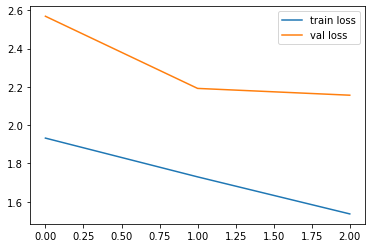

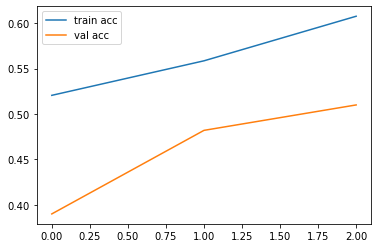

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
model.evaluate(test_set)

16/16 [==============================] - 3s 200ms/step - loss: 2.1563 - accuracy: 0.5100


[2.1563332080841064, 0.5099999904632568]